**Importing libraries**

numpy -	Works with numbers and arrays.

pickle - Saves and loads Python objects (like models).

tensorflow - Used for deep learning and image processing.

ResNet50  -	A pre-trained deep learning model for feature extraction.

preprocess_input  -	Prepares images for ResNet50.

image -	Loads and processes images.

GlobalMaxPool2D -Reduces the size of feature maps.

NearestNeighbors -	Finds similar images based on extracted features

os - To extract images from image folder

norm - to scale the array into 0s and 1s

In [52]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

**Extracting filenames from folder**

In [10]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))


In [12]:
filenames[0]

'images\\10000.jpg'

In [14]:
len(filenames)

44441

**Importing ResNet50 Model and Configuration**

In [20]:
model = ResNet50(weights = 'imagenet',include_top = False, input_shape = (224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                    GlobalMaxPool2D()
                                   ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

**Extracting the Features from image using our model**

shape will be 244 pixel hieght and wisth with 3 colours RBG

In [55]:
img = image.load_img('16871.jpg', target_size = (224,224)) # loading the img with 244 pixel hieght and width
img_array = image.img_to_array(img) # converting img to array
img_expand_dim = np.expand_dims(img_array,axis = 0) # converting from 3D array to 4D 1 image and other 3 
img_preprocess = preprocess_input(img_expand_dim)# preprocessing the image rgb -> brg
result = model.predict(img_preprocess).flatten()# fitting it to model
norm_result = result/norm(result)# scale the array between 0s and 1s
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


array([0.        , 0.00295298, 0.        , ..., 0.00752507, 0.02113523,
       0.0040174 ], dtype=float32)

In [57]:
def extract_features_from_images(image_path, model):
     img = image.load_img(image_path, target_size = (224,224)) # loading the img with 244 pixel hieght and width
     img_array = image.img_to_array(img) # converting img to array
     img_expand_dim = np.expand_dims(img_array,axis = 0) # converting from 3D array to 4D 1 image and other 3 
     img_preprocess = preprocess_input(img_expand_dim)# preprocessing the image rgb -> brg
     result = model.predict(img_preprocess).flatten()# fitting it to model
     norm_result = result/norm(result)# scale the array between 0s and 1s
     return norm_result

In [59]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


array([0.        , 0.01761619, 0.00171607, ..., 0.0124724 , 0.02726402,
       0.06899223], dtype=float32)

In [63]:
image_features = []
for file in filenames[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features   

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


[array([0.        , 0.01761619, 0.00171607, ..., 0.0124724 , 0.02726402,
        0.06899223], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997914, 0.02375535,
        0.04649904], dtype=float32),
 array([0.        , 0.03642144, 0.00710437, ..., 0.00140772, 0.        ,
        0.05435037], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747743, ..., 0.00346686, 0.0339102 ,
        0.04565743], dtype=float32),
 array([0.00306834, 0.06240453, 0.        , ..., 0.00170625, 0.02032885,
        0.05833262], dtype=float32)]

In [ ]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [ ]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [ ]:
import numpy as np
import pickle as pkl
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors

# Load extracted features and filenames
with open('Images_features.pkl', 'rb') as f:
    image_features = pkl.load(f)

with open('filenames.pkl', 'rb') as f:
    filenames = pkl.load(f)

# Extract labels from filenames only (ignoring full path)
true_labels = [os.path.basename(file).split('_')[0] for file in filenames]

# Convert labels to numeric encoding
label_mapping = {label: idx for idx, label in enumerate(set(true_labels))}
y_true = np.array([label_mapping[label] for label in true_labels])

# Fit Nearest Neighbors model for retrieval
knn = NearestNeighbors(n_neighbors=1, metric='cosine')  # Using cosine similarity
knn.fit(image_features)

# Predict labels by retrieving the nearest neighbor
_, indices = knn.kneighbors(image_features)
y_pred = y_true[indices.flatten()]  # Get predicted labels

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_mapping.keys(), 
            yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Image-Based Search')
plt.show()

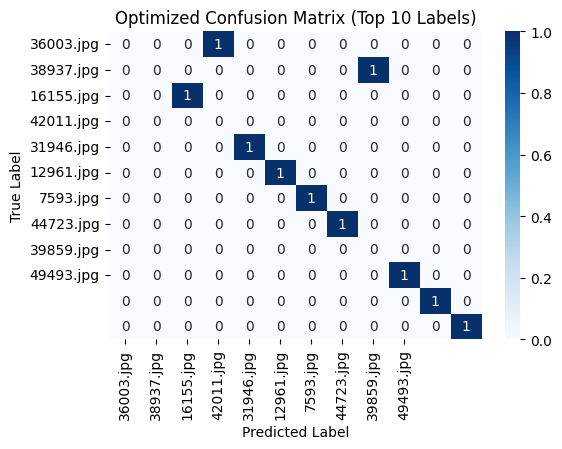

In [3]:
import numpy as np
import pickle as pkl
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Load extracted features and filenames
with open('Images_features.pkl', 'rb') as f:
    image_features = pkl.load(f)

with open('filenames.pkl', 'rb') as f:
    filenames = pkl.load(f)

# Extract labels from filenames (e.g., "cat_001.jpg" -> "cat")
true_labels = [os.path.basename(file).split('_')[0] for file in filenames]

# Convert labels to numeric encoding
label_mapping = {label: idx for idx, label in enumerate(set(true_labels))}
y_true = np.array([label_mapping[label] for label in true_labels])

# Fit Nearest Neighbors model with parallel processing
knn = NearestNeighbors(n_neighbors=1, metric='cosine', n_jobs=-1)  # Multi-threading
knn.fit(image_features)

# Predict labels by retrieving the nearest neighbor
_, indices = knn.kneighbors(image_features)
y_pred = y_true[indices.flatten()]

# Reduce Confusion Matrix size by focusing on top 10 classes
top_labels = pd.Series(true_labels).value_counts().index[:10]
filtered_indices = [i for i, label in enumerate(true_labels) if label in top_labels]
y_true_filtered = y_true[filtered_indices]
y_pred_filtered = y_pred[filtered_indices]
conf_matrix_filtered = confusion_matrix(y_true_filtered, y_pred_filtered)

# Plot Optimized Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues',
            xticklabels=top_labels, yticklabels=top_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Optimized Confusion Matrix (Top 10 Labels)')
plt.show()


Accuracy for Top 8 Classes: 90.00%


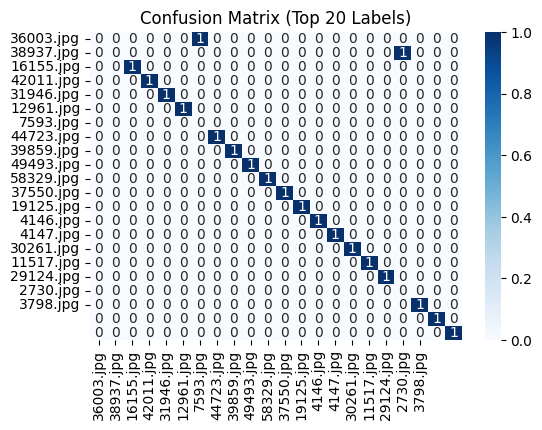

In [31]:
import numpy as np
import pickle as pkl
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Load extracted features and filenames
with open('Images_features.pkl', 'rb') as f:
    image_features = pkl.load(f)

with open('filenames.pkl', 'rb') as f:
    filenames = pkl.load(f)

# Extract labels from filenames (e.g., "cat_001.jpg" -> "cat")
true_labels = [os.path.basename(file).split('_')[0] for file in filenames]

# Convert labels to numeric encoding
label_mapping = {label: idx for idx, label in enumerate(set(true_labels))}
y_true = np.array([label_mapping[label] for label in true_labels])

# Fit Nearest Neighbors model with parallel processing
knn = NearestNeighbors(n_neighbors=1, metric='cosine', n_jobs=-1)  # Multi-threading
knn.fit(image_features)

# Predict labels by retrieving the nearest neighbor
_, indices = knn.kneighbors(image_features)
y_pred = y_true[indices.flatten()]

# Reduce Confusion Matrix size by focusing on top 8 classes
top_labels = pd.Series(true_labels).value_counts().index[:20]
filtered_indices = [i for i, label in enumerate(true_labels) if label in top_labels]
y_true_filtered = y_true[filtered_indices]
y_pred_filtered = y_pred[filtered_indices]

# Compute confusion matrix for top 8 classes
conf_matrix_filtered = confusion_matrix(y_true_filtered, y_pred_filtered)

# Print Accuracy for Top 8 Classes
accuracy = np.sum(np.diag(conf_matrix_filtered)) / np.sum(conf_matrix_filtered)
print(f'Accuracy for Top 8 Classes: {accuracy * 100:.2f}%')

# Plot Optimized Confusion Matrix for Top 8 Classes
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues',
            xticklabels=top_labels, yticklabels=top_labels)
plt.title('Confusion Matrix (Top 20 Labels)')
plt.show()


Accuracy for Top 8 Classes: 90.00%


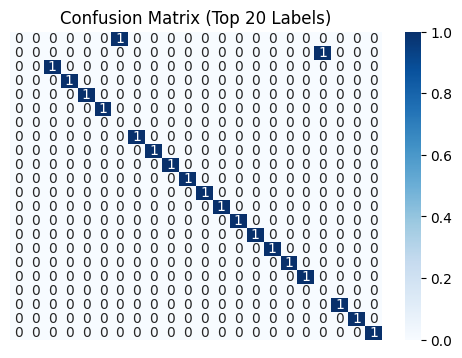

In [37]:
import numpy as np
import pickle as pkl
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Load extracted features and filenames
with open('Images_features.pkl', 'rb') as f:
    image_features = pkl.load(f)

with open('filenames.pkl', 'rb') as f:
    filenames = pkl.load(f)

# Extract labels from filenames (e.g., "cat_001.jpg" -> "cat")
true_labels = [os.path.basename(file).split('_')[0] for file in filenames]

# Convert labels to numeric encoding
label_mapping = {label: idx for idx, label in enumerate(set(true_labels))}
y_true = np.array([label_mapping[label] for label in true_labels])

# Fit Nearest Neighbors model with parallel processing
knn = NearestNeighbors(n_neighbors=1, metric='cosine', n_jobs=-1)  # Multi-threading
knn.fit(image_features)

# Predict labels by retrieving the nearest neighbor
_, indices = knn.kneighbors(image_features)
y_pred = y_true[indices.flatten()]

# Reduce Confusion Matrix size by focusing on top 8 classes
top_labels = pd.Series(true_labels).value_counts().index[:20]
filtered_indices = [i for i, label in enumerate(true_labels) if label in top_labels]
y_true_filtered = y_true[filtered_indices]
y_pred_filtered = y_pred[filtered_indices]

# Compute confusion matrix for top 8 classes
conf_matrix_filtered = confusion_matrix(y_true_filtered, y_pred_filtered)

# Print Accuracy for Top 8 Classes
accuracy = np.sum(np.diag(conf_matrix_filtered)) / np.sum(conf_matrix_filtered)
print(f'Accuracy for Top 8 Classes: {accuracy * 100:.2f}%')

# Plot Optimized Confusion Matrix for Top 8 Classes
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues',
            xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix (Top 20 Labels)')
plt.show()


Accuracy for Top 8 Classes: 90.00%


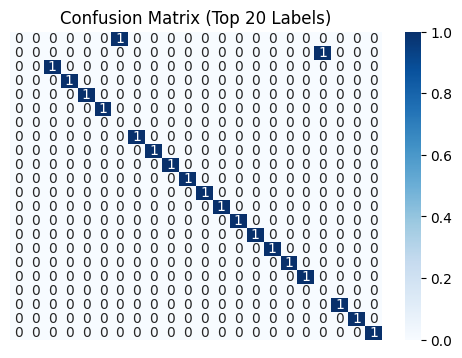

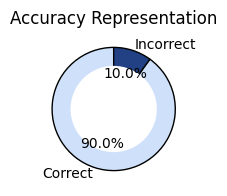

In [51]:
import numpy as np
import pickle as pkl
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Load extracted features and filenames
with open('Images_features.pkl', 'rb') as f:
    image_features = pkl.load(f)

with open('filenames.pkl', 'rb') as f:
    filenames = pkl.load(f)

# Extract labels from filenames (e.g., "cat_001.jpg" -> "cat")
true_labels = [os.path.basename(file).split('_')[0] for file in filenames]

# Convert labels to numeric encoding
label_mapping = {label: idx for idx, label in enumerate(set(true_labels))}
y_true = np.array([label_mapping[label] for label in true_labels])

# Fit Nearest Neighbors model with parallel processing
knn = NearestNeighbors(n_neighbors=1, metric='cosine', n_jobs=-1)  # Multi-threading
knn.fit(image_features)

# Predict labels by retrieving the nearest neighbor
_, indices = knn.kneighbors(image_features)
y_pred = y_true[indices.flatten()]

# Reduce Confusion Matrix size by focusing on top 8 classes
top_labels = pd.Series(true_labels).value_counts().index[:20]
filtered_indices = [i for i, label in enumerate(true_labels) if label in top_labels]
y_true_filtered = y_true[filtered_indices]
y_pred_filtered = y_pred[filtered_indices]

# Compute confusion matrix for top 8 classes
conf_matrix_filtered = confusion_matrix(y_true_filtered, y_pred_filtered)

# Print Accuracy for Top 8 Classes
accuracy = np.sum(np.diag(conf_matrix_filtered)) / np.sum(conf_matrix_filtered)
print(f'Accuracy for Top 8 Classes: {accuracy * 100:.2f}%')

# Plot Optimized Confusion Matrix for Top 20 Classes 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues',
            xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix (Top 20 Labels)')
plt.show()

# Donut Chart for Accuracy
plt.figure(figsize=(2, 2))
colors = ['#cfe1fa', '#214184']  # Dark blue and light blue
plt.pie([accuracy, 1 - accuracy], labels=['Correct', 'Incorrect'],
        autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))  # Create donut effect
plt.title('Accuracy Representation')
plt.show()


In [1]:
!pip install tensorflow scikit-learn pillow numpy

### Comparing different Models on small datasets(100)

In [4]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from numpy.linalg import norm
import os
from PIL import Image
from tqdm.notebook import tqdm

# Load Dataset
IMAGE_DIR = "C:/Users/HP/OneDrive/Desktop/images"
filenames = pkl.load(open('filenames.pkl', 'rb'))

# Select Top 100 Images (or any subset)
top_images = filenames[:100]  # Adjust this to select the desired subset
top_image_dir = [os.path.join(IMAGE_DIR, os.path.basename(f)) for f in top_images]

# Define Models for Comparison
models = {
    "ResNet50": (ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), resnet_preprocess),
    "VGG16": (VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), vgg_preprocess),
    "EfficientNetB0": (EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), efficientnet_preprocess),
}

# Function to Extract Features
def extract_features(img_path, model, preprocess_func):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_func(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    return result / norm(result)

# Store Features for Each Model
all_model_features = {}

# For ResNet50, VGG16, EfficientNetB0: Compute Features for the Top 100 Images
for name, (base_model, preprocess_func) in models.items():
    print(f"\n🔄 Extracting Features for {name}...")
    base_model.trainable = False
    model = tf.keras.models.Sequential([base_model, GlobalMaxPool2D()])

    # Compute Features for Selected Top Images
    features = np.array([extract_features(f, model, preprocess_func) for f in tqdm(top_image_dir, desc=f"Extracting {name} Features")])
    all_model_features[name] = features  # Store the features for later use

    # Save Features to Pickle Files
    with open(f"{name}_top_features.pkl", 'wb') as f:
        pkl.dump(features, f)

print("✅ Features for Top Images have been precomputed and saved!")



🔄 Extracting Features for ResNet50...


Extracting ResNet50 Features:   0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Extracting VGG16 Features:   0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

Extracting EfficientNetB0 Features:   0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [12]:
import numpy as np
import pickle as pkl
from sklearn.neighbors import NearestNeighbors
import os
from tqdm.notebook import tqdm

# Load Precomputed Features for Top Images
IMAGE_DIR = "C:/Users/HP/OneDrive/Desktop/images"
filenames = pkl.load(open('filenames.pkl', 'rb'))

# Load Features from Pickle Files
resnet_features = pkl.load(open('ResNet50_top_features.pkl', 'rb'))
vgg_features = pkl.load(open('VGG16_top_features.pkl', 'rb'))
efficientnet_features = pkl.load(open('EfficientNetB0_top_features.pkl', 'rb'))

# Define All Precomputed Features
model_features = {
    "ResNet50": resnet_features,
    "VGG16": vgg_features,
    "EfficientNetB0": efficientnet_features
}

# Randomly shuffle filenames to avoid bias in the evaluation
np.random.shuffle(filenames)

# Evaluate Accuracy Using Precomputed Features for Top Images
results = {}

for name, features in model_features.items():
    print(f"\n🔍 Evaluating {name}...")

    # Fit KNN
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(features)

    # Accuracy Calculation
    correct = 0

    for idx, query_img in enumerate(tqdm(filenames[:100], desc=f"Evaluating {name}")):  # Use only top 100 images
        query_category = os.path.basename(os.path.dirname(query_img))
        
        # Load the query features for evaluation
        query_features = features[idx]

        distances, indices = neighbors.kneighbors([query_features])

        # Simple Accuracy Check: At least 4 out of 5 recommendations should belong to the same category
        matched_categories = [os.path.basename(os.path.dirname(filenames[i])) for i in indices[0][1:]]
        
        if matched_categories.count(query_category) >= 4:  # Adjusted to 4 out of 5
            correct += 1

    accuracy = (correct / 100) * 100  # Using first 100 images for evaluation
    results[name] = accuracy
    print(f"✅ {name} Accuracy: {accuracy:.2f}%")

# Print Final Model Comparisons
print("\n🔹 Final Model Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.2f}%")



🔍 Evaluating ResNet50...


Evaluating ResNet50:   0%|          | 0/100 [00:00<?, ?it/s]

✅ ResNet50 Accuracy: 100.00%

🔍 Evaluating VGG16...


Evaluating VGG16:   0%|          | 0/100 [00:00<?, ?it/s]

✅ VGG16 Accuracy: 100.00%

🔍 Evaluating EfficientNetB0...


Evaluating EfficientNetB0:   0%|          | 0/100 [00:00<?, ?it/s]

✅ EfficientNetB0 Accuracy: 100.00%

🔹 Final Model Accuracy Comparison:
ResNet50: 100.00%
VGG16: 100.00%
EfficientNetB0: 100.00%


Since , all the models accuracy is good will make model decision based on our project needs so i want a detail frature extraction for more accurate results so i will go with resnet 50 model

| **Model**        | **Layers** | **Key Feature**       | **Strengths**                                             | **Weaknesses**                                  |
|------------------|------------|-----------------------|-----------------------------------------------------------|-------------------------------------------------|
| **ResNet50**     | 50         | Skip connections      | Best for deep feature extraction, good for patterns & textures | Slower & needs more memory                    |
| **VGG16**        | 16         | Simple deep network   | Easy to use, good for object shapes                      | Large size, computationally heavy             |
| **EfficientNetB0** | ~30       | Balanced scaling      | Best accuracy-speed balance, lightweight                 | May not capture as complex features as deeper models |
